In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
submission = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")

## Understanding the data

For this task, the data is already sourced, and formatted. A summary of the data is below

* **Train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
  *  **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
  * **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
  * **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
  * **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
  * **Destination** - The planet the passenger will be debarking to.
  * **Age** - The age of the passenger.
  * **VIP** - Whether the passenger has paid for special VIP service during the voyage.
  * **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
  * **Name** - The first and last names of the passenger.
  * **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
  

* **Test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
* **Sample_submission.csv** - A submission file in the correct format.
  * **PassengerId** - Id for each passenger in the test set.
  * **Transported** - The target. For each passenger, predict either True or False.



In [3]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
round(train.isna().sum()/len(train) *100,3)


PassengerId     0.000
HomePlanet      2.312
CryoSleep       2.496
Cabin           2.289
Destination     2.094
Age             2.059
VIP             2.335
RoomService     2.082
FoodCourt       2.105
ShoppingMall    2.393
Spa             2.105
VRDeck          2.163
Name            2.301
Transported     0.000
dtype: float64

## Cleaning and Enriching data

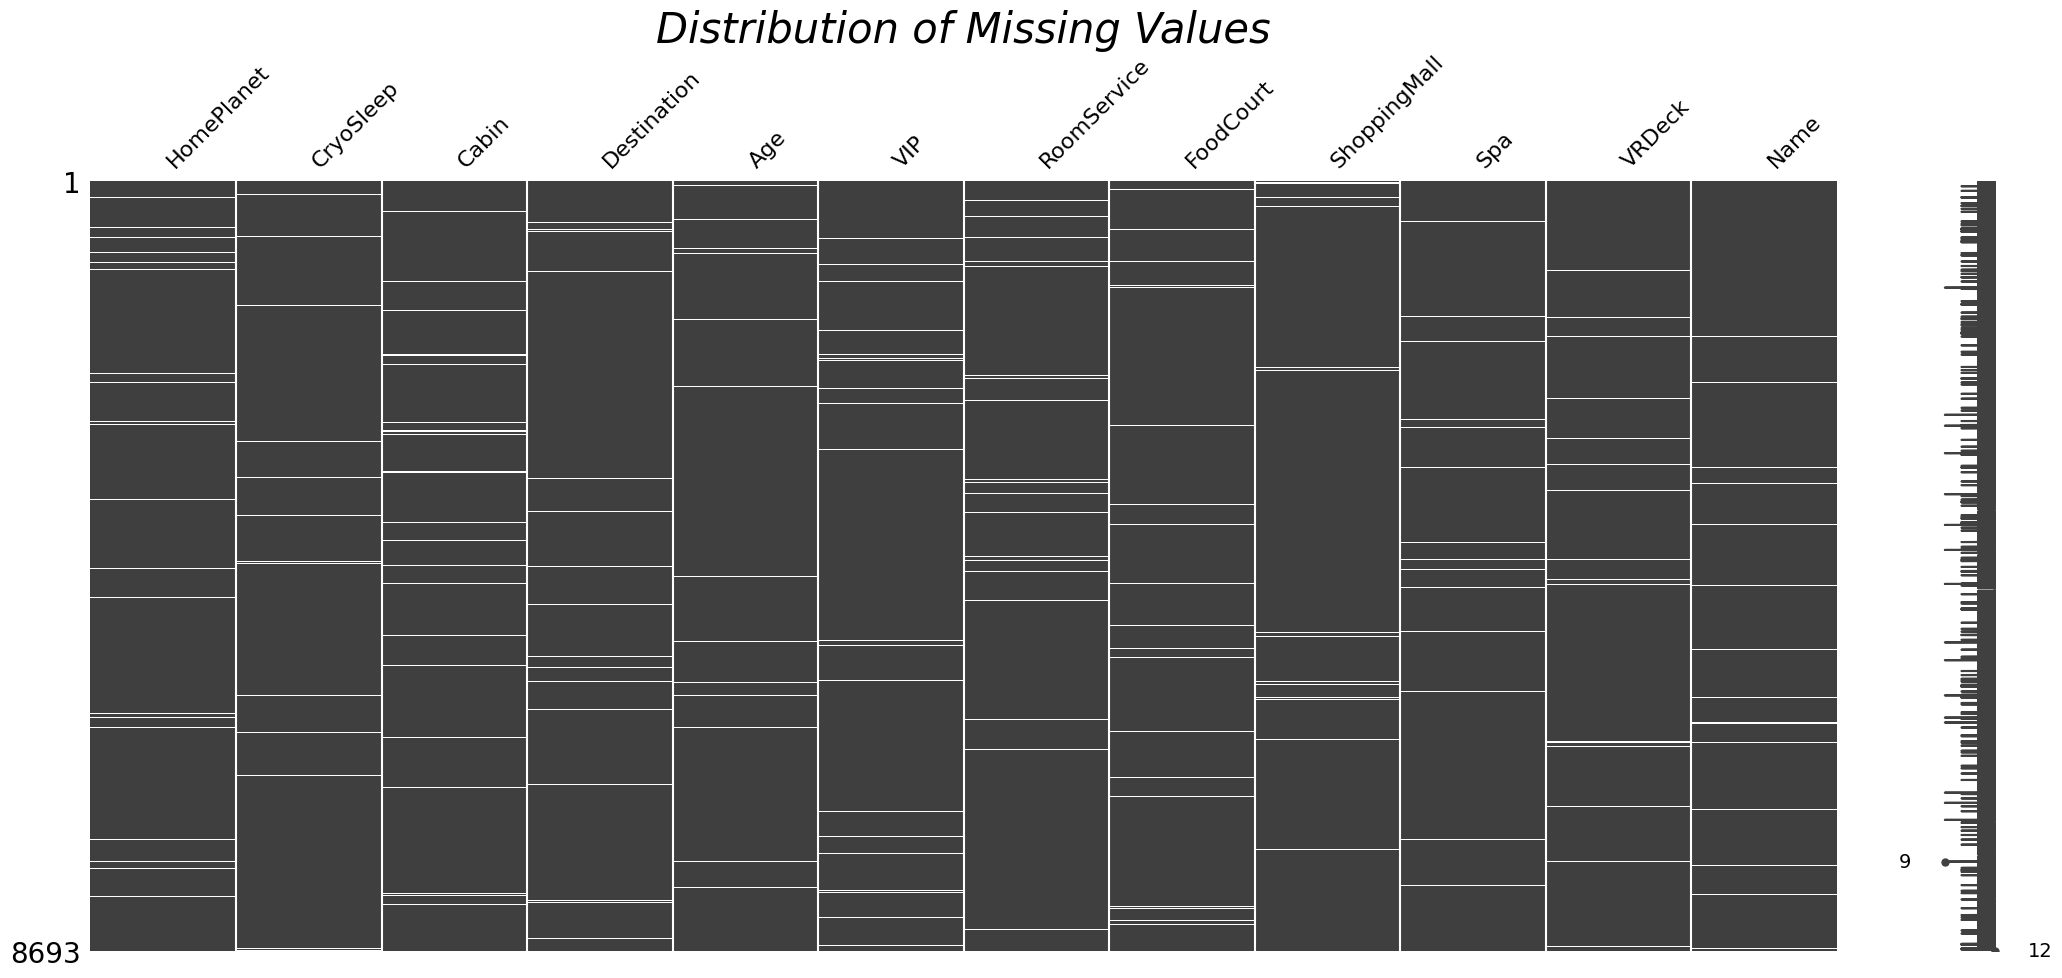

In [6]:
import missingno as msno
missing_cols= train.columns[train.isnull().any()]
msno.matrix(train[missing_cols])
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique');

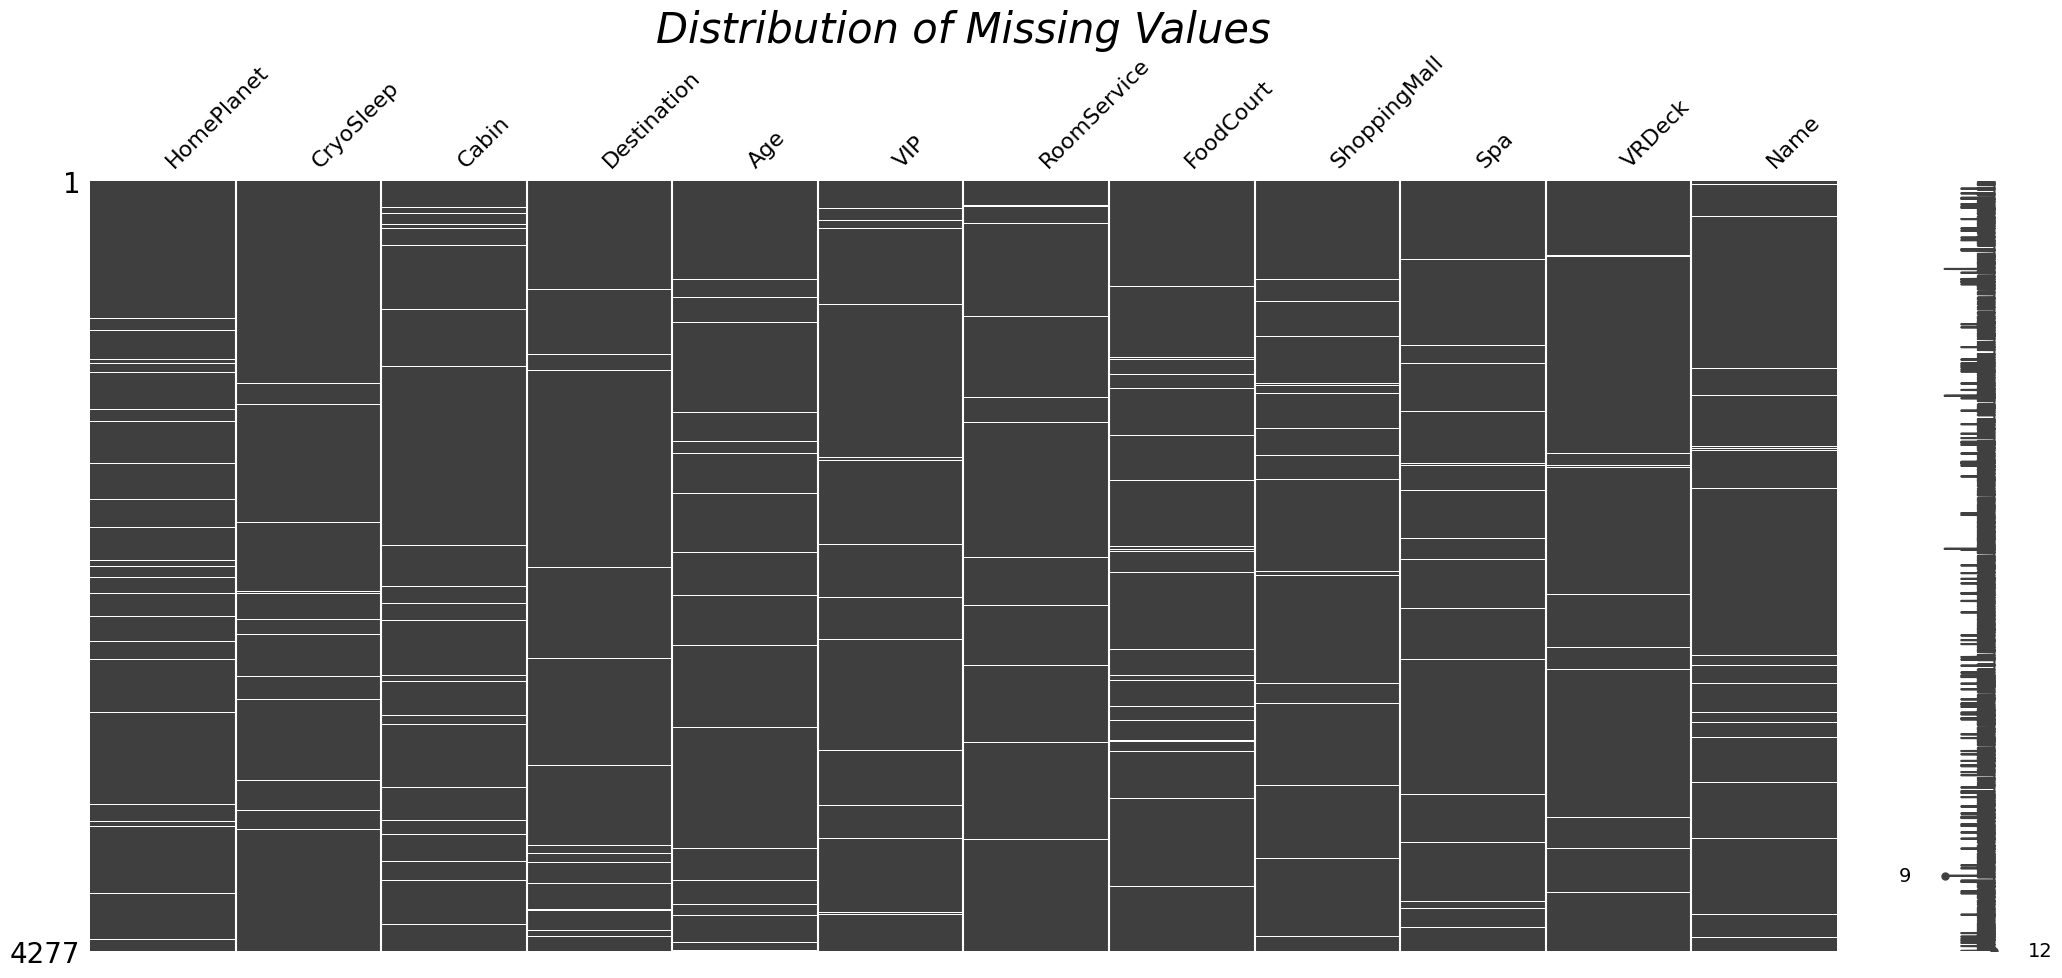

In [7]:
missing_columns= test.columns[test.isnull().any()]
msno.matrix(test[missing_columns])
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique');

In [8]:
#Very simple imputation, replace all missing values with the modal value
train[missing_cols]=train[missing_cols].fillna(train.mode().iloc[0])
test[missing_columns]=test[missing_columns].fillna(test.mode().iloc[0])

In [9]:
display(round(train.isna().sum()/len(train) *100,3))
display(round(test.isna().sum()/len(test) *100,3))

PassengerId     0.0
HomePlanet      0.0
CryoSleep       0.0
Cabin           0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Name            0.0
Transported     0.0
dtype: float64

PassengerId     0.0
HomePlanet      0.0
CryoSleep       0.0
Cabin           0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Name            0.0
dtype: float64

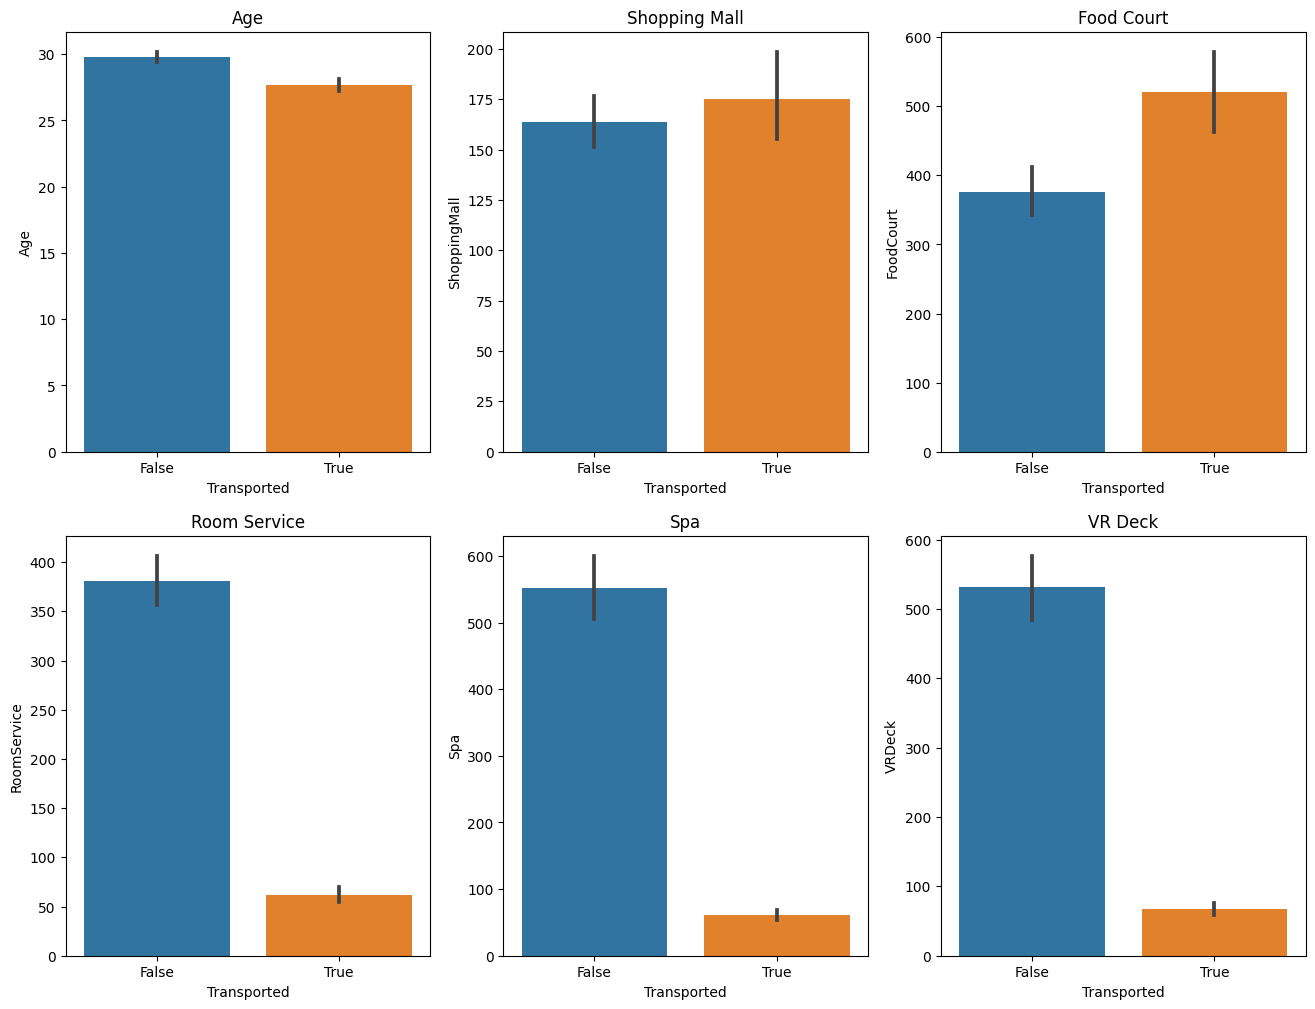

In [10]:
plt.figure(figsize = (16,12))

plt.subplot(2,3,1)
plt.title("Age")
sns.barplot(data = train, x = "Transported", y = "Age");

plt.subplot(2,3,2)
plt.title("Shopping Mall")
sns.barplot(data = train, x = "Transported", y = "ShoppingMall");

plt.subplot(2,3,3)
plt.title("Food Court")
sns.barplot(data = train, x = "Transported", y = "FoodCourt");

plt.subplot(2,3,4)
plt.title("Room Service")
sns.barplot(data = train, x = "Transported", y = "RoomService");

plt.subplot(2,3,5)
plt.title("Spa")
sns.barplot(data = train, x = "Transported", y = "Spa");

plt.subplot(2,3,6)
plt.title("VR Deck")
sns.barplot(data = train, x = "Transported", y = "VRDeck");

Insight: Age, Shopping Mall, and Food court had little to no effect. However, Room service, Spa and VR Deck had a significant effect

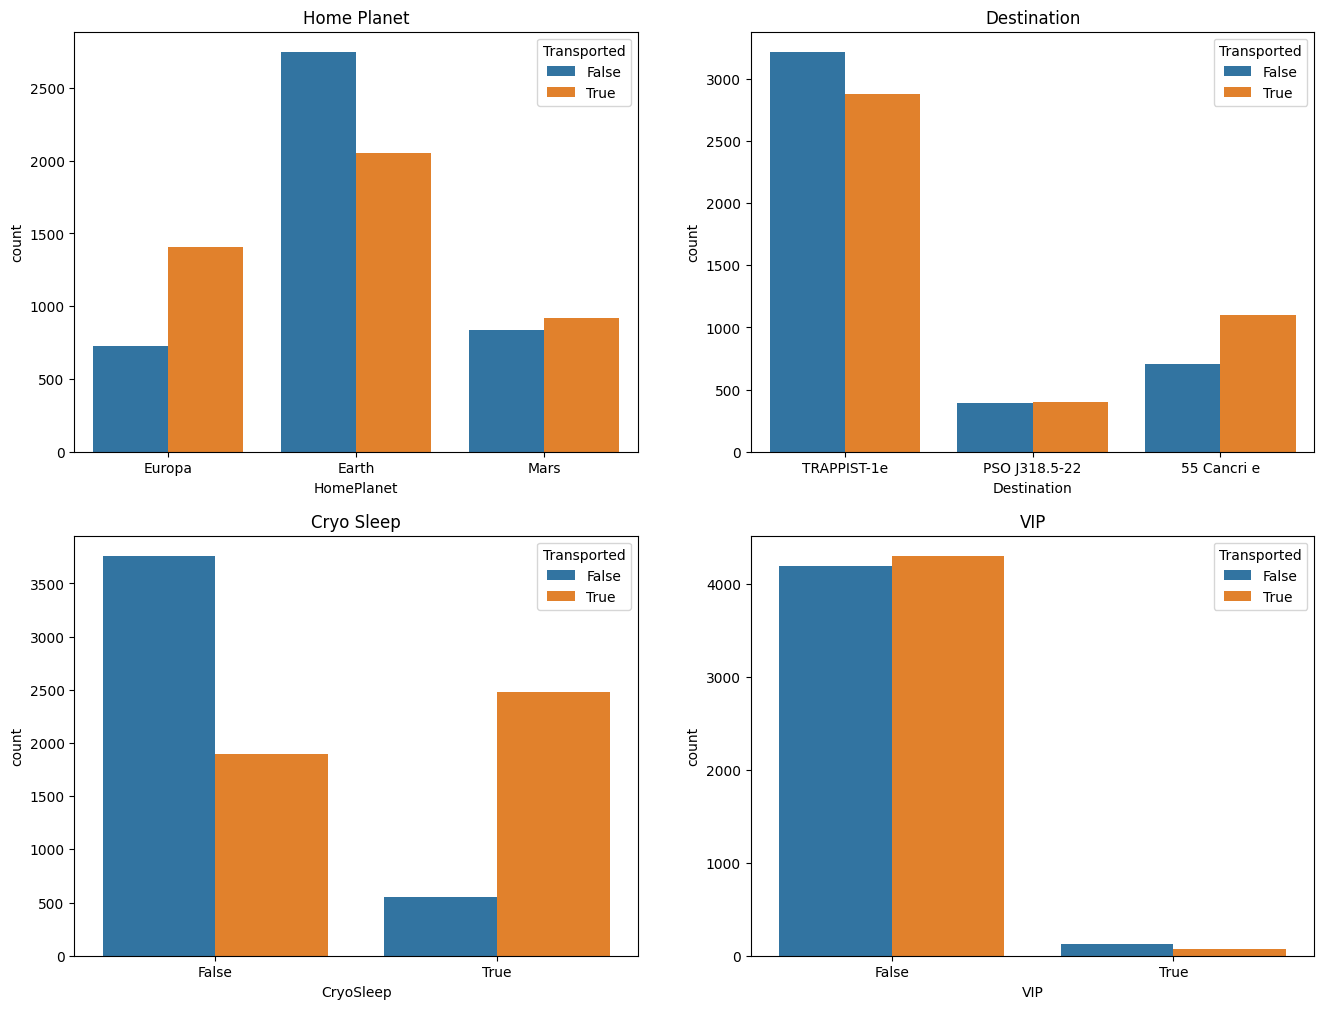

In [11]:
plt.figure(figsize = (16,12))

plt.subplot(2,2,1)
plt.title("Home Planet")
sns.countplot(data = train,x="HomePlanet", hue = "Transported");

plt.subplot(2,2,2)
plt.title("Destination")
sns.countplot(data = train,x="Destination", hue = "Transported");

plt.subplot(2,2,3)
plt.title("Cryo Sleep")
sns.countplot(data = train,x="CryoSleep", hue = "Transported");

plt.subplot(2,2,4)
plt.title("VIP")
sns.countplot(data = train,x="VIP", hue = "Transported");

## Model implementation

In [12]:
#Label encoding--
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in train.columns:
    train[i] = label_encoder.fit_transform(train[i])

In [13]:
#Label encoding--
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in test.columns:
    test[i] = label_encoder.fit_transform(test[i])